<a href="https://colab.research.google.com/github/hasnanurh/dry-flower-classification-mobilenetv2/blob/main/TA2_Dry_Flower_Classification__MobileNetV2_Fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mounting Drive

In [ ]:
#Mounting Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
!python --version

Python 3.7.13


# Import Dataset

In [ ]:
#Import Dataset
%cd /content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset

/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset


In [ ]:
!ls

dry_flower.zip	output


In [ ]:
!unzip dry_flower.zip

Archive:  dry_flower.zip
   creating: dry_flower/baby_breath/
  inflating: dry_flower/baby_breath/baby_1.jpg  
  inflating: dry_flower/baby_breath/baby_10.jpg  
  inflating: dry_flower/baby_breath/baby_100.jpg  
  inflating: dry_flower/baby_breath/baby_101.jpg  
  inflating: dry_flower/baby_breath/baby_102.jpg  
  inflating: dry_flower/baby_breath/baby_103.jpg  
  inflating: dry_flower/baby_breath/baby_104.jpg  
  inflating: dry_flower/baby_breath/baby_105.jpg  
  inflating: dry_flower/baby_breath/baby_106.jpg  
  inflating: dry_flower/baby_breath/baby_107.jpg  
  inflating: dry_flower/baby_breath/baby_108.jpg  
  inflating: dry_flower/baby_breath/baby_109.jpg  
  inflating: dry_flower/baby_breath/baby_11.jpg  
  inflating: dry_flower/baby_breath/baby_110.jpg  
  inflating: dry_flower/baby_breath/baby_111.jpg  
  inflating: dry_flower/baby_breath/baby_112.jpg  
  inflating: dry_flower/baby_breath/baby_113.jpg  
  inflating: dry_flower/baby_breath/baby_114.jpg  
  inflating: dry_flower/

In [ ]:
import os

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/dry_flower/baby_breath')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/dry_flower/cotton_flower')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/dry_flower/lagurus')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/dry_flower/pampas')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/dry_flower/setaria')))

250
260
264
260
254


# Loading Image

In [ ]:
#Loading Image for Sample Data
BASE_DIR ='/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/dry_flower'

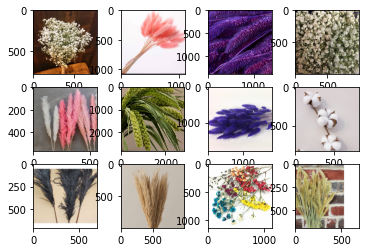

In [ ]:
import numpy as np
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt
import glob
import random

img_list = glob.glob(os.path.join(BASE_DIR, '*/*.jpg'))

for i, img_path in enumerate(random.sample(img_list, 12)):
    img = image.load_img(img_path)
    img = image.img_to_array(img, dtype=np.uint8)

    plt.subplot(3, 4, i+1)
    plt.imshow(img.squeeze())

# Data Preprocessing

## Data Augmentation

In [ ]:
#Data Augmentation

from keras.preprocessing.image import ImageDataGenerator
from skimage import io

In [ ]:
import numpy as np
import os
from PIL import Image

### Baby Breath Augmentation

In [ ]:
##Baby Breath Augmentation
datagen_aug = ImageDataGenerator(
    rotation_range = 20,
    #width_shift_range = 0.2,
    #height_shift_range = 0.2,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'constant', cval=255
)

In [ ]:
baby_directory = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/dry_flower/baby_breath/'
SIZE = 224
dataset = []

In [ ]:
my_images = os.listdir(baby_directory)
for i, image_name in enumerate(my_images):
  if(image_name.split('.')[1] == 'jpg'):
    image = io.imread(baby_directory + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))

In [ ]:
x = np.array(dataset)

In [ ]:
i = 0
for batch in datagen_aug.flow(x, batch_size=1, save_to_dir='/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/baby_breath',
                              save_prefix = 'baby_breath',
                              save_format ='jpg'):
  i += 1
  if i > 2500:
    break

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/baby_breath')))

2487


### Cotton Flower Augmentation

In [ ]:
## Cotton Flower Augmentation
datagen_aug = ImageDataGenerator(
    rotation_range = 30,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
cotton_directory = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/dry_flower/cotton_flower/'
SIZE = 224
dataset = []

In [ ]:
my_images = os.listdir(cotton_directory)
for i, image_name in enumerate(my_images):
  if(image_name.split('.')[1] == 'jpg'):
    image = io.imread(cotton_directory + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))

In [ ]:
x = np.array(dataset)

In [ ]:
i = 0
for batch in datagen_aug.flow(x, batch_size=1, save_to_dir='/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/cotton_flower',
                              save_prefix = 'cotton_flower',
                              save_format ='jpg'):
  i += 1
  if i > 2500:
    break

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/cotton_flower')))

2430


### Lagurus Augmentation

In [ ]:
## Lagurus Augmentation
datagen_aug = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
lagurus_directory = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/dry_flower/lagurus/'
SIZE = 224
dataset = []

In [ ]:
my_images = os.listdir(lagurus_directory)
for i, image_name in enumerate(my_images):
  if(image_name.split('.')[1] == 'jpg'):
    image = io.imread(lagurus_directory + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))

In [ ]:
x = np.array(dataset)

In [ ]:
i = 0
for batch in datagen_aug.flow(x, batch_size=1, save_to_dir='/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/lagurus',
                              save_prefix = 'lagurus',
                              save_format ='jpg'):
  i += 1
  if i > 2500:
    break

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/lagurus')))

2499


### Pampas Augmentation

In [ ]:
datagen_aug = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
## Pampas Augmentation
pampas_directory = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/dry_flower/pampas/'
SIZE = 224
dataset = []

In [ ]:
my_images = os.listdir(pampas_directory)
for i, image_name in enumerate(my_images):
  if(image_name.split('.')[1] == 'jpg'):
    image = io.imread(pampas_directory + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))

In [ ]:
x = np.array(dataset)

In [ ]:
i = 0
for batch in datagen_aug.flow(x, batch_size=1, save_to_dir='/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/pampas',
                              save_prefix = 'pampas',
                              save_format ='jpg'):
  i += 1
  if i > 2500:
    break

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/pampas')))

2479


### Setaria Augmentation

In [ ]:
## Setaria Augmentation
datagen_aug = ImageDataGenerator(
    rotation_range = 20,
    #width_shift_range = 0.1,
    #height_shift_range = 0.1,
    #shear_range = 0.2,
    #zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
setaria_directory = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/dry_flower/setaria/'
SIZE = 224
dataset = []

In [ ]:
my_images = os.listdir(setaria_directory)
for i, image_name in enumerate(my_images):
  if(image_name.split('.')[1] == 'jpg'):
    image = io.imread(setaria_directory + image_name)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((SIZE, SIZE))
    dataset.append(np.array(image))

In [ ]:
x = np.array(dataset)

In [ ]:
i = 0
for batch in datagen_aug.flow(x, batch_size=1, save_to_dir='/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/setaria',
                              save_prefix = 'setaria',
                              save_format ='jpg'):
  i += 1
  if i > 2500:
    break

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/setaria')))

2500


## Splitting Dataset Into Data Train, Val, and Test (80, 10,10)

In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/baby_breath')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/cotton_flower')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/lagurus')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/pampas')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/setaria')))

2487
2430
2489
2479
2462


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

In [ ]:
input_folder = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_aug/'
output_folder = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/'

In [ ]:
splitfolders.ratio(input_folder, output=output_folder, seed= 1337, ratio=(0.8, 0.1, 0.1),group_prefix=None)

Copying files: 12347 files [05:56, 34.64 files/s]


In [ ]:
import os
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/train/baby_breath')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/train/cotton_flower')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/train/lagurus')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/train/pampas')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/train/setaria')))


1989
1944
1991
1983
1969


In [ ]:
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/val/baby_breath')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/val/cotton_flower')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/val/lagurus')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/val/pampas')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/val/setaria')))

248
243
248
247
246


In [ ]:
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/test/baby_breath')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/test/cotton_flower')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/test/lagurus')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/test/pampas')))
print(len(os.listdir('/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/test/setaria')))

250
243
250
249
247


# View Data

In [ ]:
class data:
    def __init__(self, path):
        self.path = path
    
    def dataframe(self):
        path_name= []
        target_name = []
        for i in os.listdir(self.path):
            for j in os.listdir(os.path.join(self.path + "/", i)):
                pic = os.path.join(self.path + "/", i + "/", j)
                path_name.append(pic)
                target_name.append(i) 
        asl = pd.DataFrame()
        asl["image"] = path_name
        asl["target"] = target_name 
        return asl

## View train data

In [ ]:
import os
import pandas as pd

train_dir = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/train'
flowers = data(train_dir)
flower_train = flowers.dataframe()
flower_train

,image,target
0,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
1,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
2,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
3,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
4,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
...,...,...
9871,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
9872,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
9873,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
9874,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath


In [ ]:
import numpy as np

In [ ]:
unique, count = np.unique(flower_train.target, return_counts =True)
target_unique = {k:v for (k,v) in zip(unique, count)}
target_unique

{'baby_breath': 1989,
 'cotton_flower': 1944,
 'lagurus': 1991,
 'pampas': 1983,
 'setaria': 1969}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


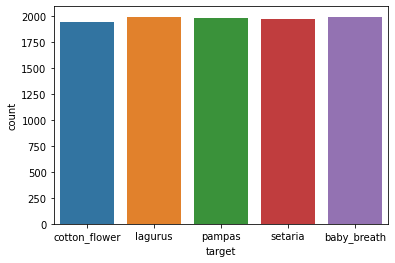

In [ ]:
import seaborn as sns

sns.countplot(flower_train.target)

## View val data

In [ ]:
import os
import pandas as pd

val_dir = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/val'
flowers = data(val_dir)
flower_val = flowers.dataframe()
flower_val

,image,target
0,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
1,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
2,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
3,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
4,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
...,...,...
1227,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
1228,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
1229,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
1230,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath


In [ ]:
import numpy as np

In [ ]:
unique, count = np.unique(flower_val.target, return_counts =True)
target_unique = {k:v for (k,v) in zip(unique, count)}
target_unique

{'baby_breath': 248,
 'cotton_flower': 243,
 'lagurus': 248,
 'pampas': 247,
 'setaria': 246}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


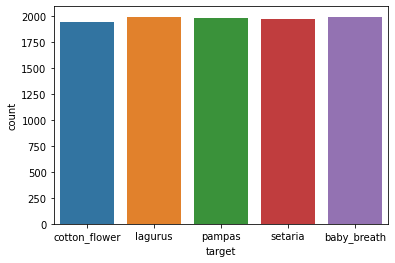

In [ ]:
import seaborn as sns

sns.countplot(flower_train.target)

## View test data

In [ ]:
import os
import pandas as pd

test_dir = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/test'
flowers = data(test_dir)
flower_test = flowers.dataframe()
flower_test

,image,target
0,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
1,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
2,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
3,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
4,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,cotton_flower
...,...,...
1234,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
1235,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
1236,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
1237,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath


In [ ]:
import numpy as np

In [ ]:
unique, count = np.unique(flower_test.target, return_counts =True)
target_unique = {k:v for (k,v) in zip(unique, count)}
target_unique

{'baby_breath': 250,
 'cotton_flower': 243,
 'lagurus': 250,
 'pampas': 249,
 'setaria': 247}

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


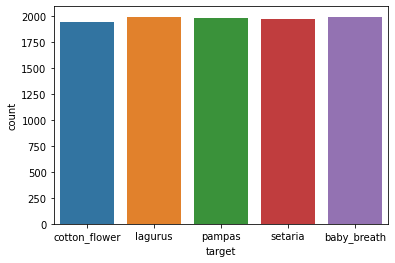

In [ ]:
import seaborn as sns

sns.countplot(flower_train.target)

# Implementation Model

## Data Preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMG_SIZE = (224, 224)
INPUT_SHAPE = (224,224,3)
BATCH_SIZE = 32

In [ ]:
training_datagen = ImageDataGenerator(rescale=1. / 255)
TRAINING_DIR = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/train'

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                       target_size= IMG_SIZE,
                                                       batch_size= BATCH_SIZE,
                                                       shuffle=True,
                                                       class_mode='categorical')

Found 9876 images belonging to 5 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale=1. / 255)

VAL_DIR = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/val'

val_generator = val_datagen.flow_from_directory(VAL_DIR,
                                                     target_size= IMG_SIZE,
                                                     batch_size= BATCH_SIZE,
                                                     shuffle=True,
                                                     class_mode='categorical')

Found 1232 images belonging to 5 classes.


In [ ]:
train_generator.class_indices

{'baby_breath': 0, 'cotton_flower': 1, 'lagurus': 2, 'pampas': 3, 'setaria': 4}

## Modeling Use MobileNetV2

In [ ]:
## Modeling use MobileNetV2

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from imutils import paths
import os
import cv2
import datetime
import numpy as np

In [ ]:
INPUT_SHAPE = (224,224,3)

base_model = tf.keras.applications.MobileNetV2(input_shape=INPUT_SHAPE, 
                                               include_top=False, 
                                               weights='imagenet')

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
image_batch, label_batch = next(iter(train_generator))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [ ]:
# freeze untuk mencegah bobot lapisan tertentu diperbarui selama pelatihan 
base_model.trainable = False

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
## Model MobileNetV2 Orisinal
input_layer = tf.keras.Input(shape=INPUT_SHAPE)

model_layers = base_model(input_layer)
model_layers = GlobalAveragePooling2D()(model_layers)
output_layers=Dense(5, activation='softmax')(model_layers)

model = tf.keras.Model(input_layer, output_layers)

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


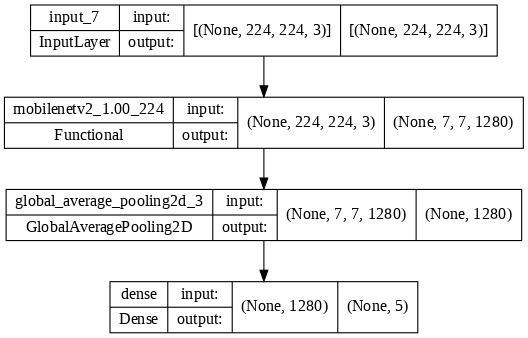

In [ ]:
model_viz = tf.keras.utils.plot_model(model,
                                      to_file='/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/model/model_mobilenetv2_orisinal/model_orisinal.png',
                                      show_shapes=True,
                                      show_layer_names=True,
                                      dpi = 80
                                      
)

model_viz


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
                loss='categorical_crossentropy', 
                metrics=['acc'])

## Training Model

In [ ]:
import time

start = time.time()

hist = model.fit(train_generator,
              steps_per_epoch=len(train_generator),
              epochs=10,
              #epochs=15
              #epochs=30
              verbose=1,
              validation_steps=len(val_generator),
              validation_data=val_generator
              )
print("Total time: ", time.time() - start, "seconds")

Epoch 1/10
114/309 [==========>...................] - ETA: 17:23 - loss: 1.2367 - acc: 0.5003

In [ ]:
import pandas as pd

history = pd.DataFrame(hist.history)
history['epoch'] = hist.epoch
history

,loss,acc,val_loss,val_acc,epoch
0,0.981357,0.649757,0.543859,0.849026,0
1,0.394262,0.898339,0.348534,0.905032,1
2,0.275385,0.927602,0.273012,0.926136,2
3,0.218321,0.941778,0.230249,0.934253,3
4,0.183437,0.950284,0.201546,0.943182,4
5,0.158833,0.958283,0.180900,0.949675,5
6,0.140374,0.964054,0.162972,0.953734,6
7,0.125425,0.969117,0.149752,0.955357,7
8,0.113279,0.971851,0.140661,0.956169,8
9,0.103079,0.976104,0.130945,0.961039,9


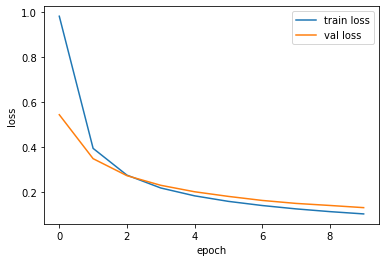

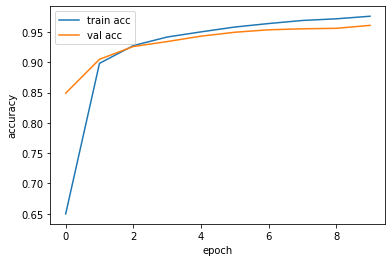

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='val loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['acc'], label='train acc')
plt.plot(hist.history['val_acc'], label='val acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Test

In [ ]:
base_dir_test = '/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/test'
flower_test = data(base_dir_test)
data_flower_test = flower_test.dataframe()
data_flower_test.tail()

,image,target
1234,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
1235,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
1236,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
1237,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath
1238,/content/drive/MyDrive/TUGAS AKHIRKU/new_datas...,baby_breath


{'baby_breath': 250, 'cotton_flower': 243, 'lagurus': 250, 'pampas': 249, 'setaria': 247}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


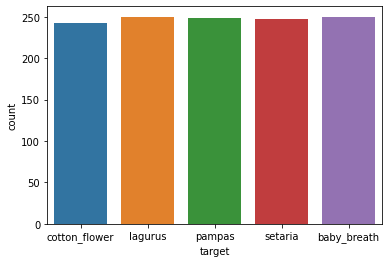

In [ ]:
unique, count = np.unique(data_flower_test.target, return_counts =True)
target_unique = {k:v for (k,v) in zip(unique, count)}
print(target_unique)
sns.countplot(data_flower_test.target)

In [ ]:
from skimage import measure, morphology
from skimage.io import imsave, imread
from skimage.filters import threshold_otsu
from skimage.transform import resize
import numpy as np

#Memuat dataset pengujian
X_test = []
y_test = []
labels = ['baby_breath',
          'cotton_flower',
          'lagurus',
          'pampas',
          'setaria'
          ]

for i,label in enumerate(labels):
    folder = os.path.join("/content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/flower_prep/flower_split/test/",label)
    files = sorted(os.listdir(folder))
    files = [x for x in files if x.endswith(".jpg")]
    for k,file in enumerate(files):
        image_path = os.path.join(folder, file)
        
        image = imread(image_path)/255.
        image = resize(image,(224,224,3))
        X_test.append(image)
        category = os.path.split(folder)[-1]
        y_test.append(i)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [ ]:
print("Bentuk array dari dataset test (pengujian) adalah:", X_test.shape,y_test.shape)

Bentuk array dari dataset test (pengujian) adalah: (1239, 224, 224, 3) (1239,)


In [ ]:
y_test2 = to_categorical(y_test)
X_test3, y_test3 = (X_test, y_test2)

In [ ]:
loss, mae = model.evaluate(x= X_test3, y = y_test3, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} Report Execution Time".format(mae))

Testing set Mean Abs Error:  0.97 Report Execution Time


In [ ]:
#Memeriksa matriks model
print(model.metrics_names)
#Evaluasi data test) 
result = model.evaluate(x= X_test3, y = y_test3)

['loss', 'acc']
39/39 [==============================] - 2s 45ms/step - loss: 0.1169 - acc: 0.9661


In [ ]:
#Menampilkan matriks yang benar dan matriks hasil prediksi

#Label yang benar
y_true = np.argmax(y_test2,axis=1)

#Label prediksi
Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print(y_true)
print(y_pred)


[0 0 0 ... 4 4 4]
[0 0 0 ... 4 4 4]


Confusion matrix, without normalization
[[249   0   1   0   0]
 [  0 243   0   0   0]
 [  0   0 229  13   8]
 [  0   0   5 238   6]
 [  0   0   2   7 238]]


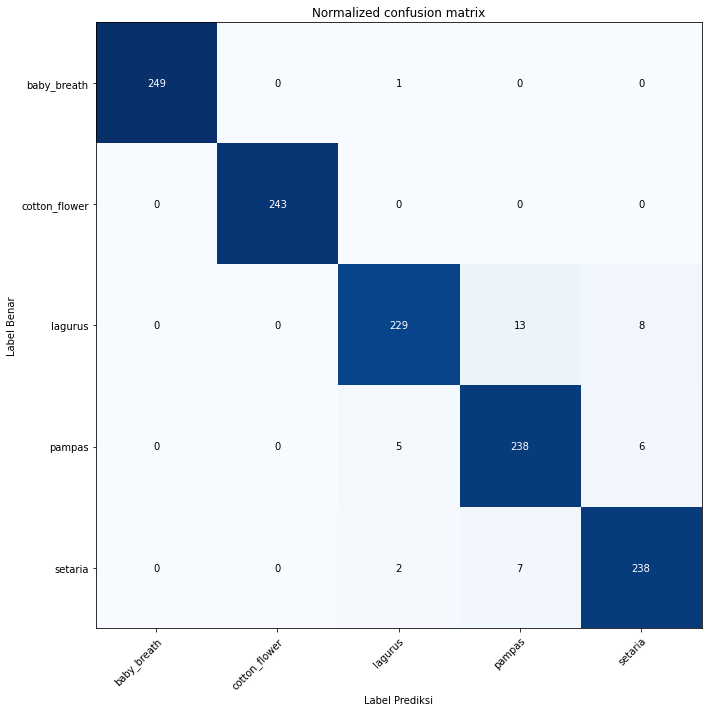

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    # """
    # This function prints and plots the confusion matrix.
    # Normalization can be applied by setting `normalize=True`.
    # """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    #ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Label Benar',
           xlabel='Label Prediksi')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plot_confusion_matrix(y_true, y_pred, classes=labels, normalize=False,
                      title='Normalized confusion matrix')

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

classification_metrics = metrics.classification_report(y_true, y_pred, target_names=labels)

In [ ]:
print(classification_metrics)

               precision    recall  f1-score   support

  baby_breath       1.00      1.00      1.00       250
cotton_flower       1.00      1.00      1.00       243
      lagurus       0.97      0.92      0.94       250
       pampas       0.92      0.96      0.94       249
      setaria       0.94      0.96      0.95       247

     accuracy                           0.97      1239
    macro avg       0.97      0.97      0.97      1239
 weighted avg       0.97      0.97      0.97      1239



In [ ]:
from tensorflow.keras.models import load_model

model.save('//content/drive/MyDrive/TUGAS AKHIRKU/new_dataset/flower_dataset/output/model/model_mobilenetv2_orisinal/skenario/model_0,0001_epoch10.h5')

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('/content/drive/MyDrive/TUGAS AKHIR/dataset_flower/model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("/content/drive/MyDrive/TUGAS AKHIR/dataset_flower/model.tflite", "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp4tzzjjo0/assets


INFO:tensorflow:Assets written to: /tmp/tmp4tzzjjo0/assets


14126704

## Predict gambar individual

In [ ]:
import tensorflow as tf
model_conv = tf.keras.models.load_model('/content/drive/MyDrive/TUGAS AKHIR/dataset_flower/model.h5')

In [ ]:
labels = ['baby_breath',
          'cotton_flower',
          'lagurus',
          'pampas',
          'setaria'
          ]

In [ ]:
image_shape = (224, 224)
image_size = 224

In [ ]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
import numpy as np
upload = files.upload()
  
for fn in upload.keys():
  # predict image
  path = fn
  img = cv2.imread(path)
  img = cv2.resize(img, image_shape)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.figure()
  plt.imshow(img) 
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  img_tensor = np.vstack([img_tensor])

  classes = model_conv.predict(img_tensor)
  pred = np.argmax(classes, axis=1)

  print('hasil prediksi : ', labels[int(pred)])